In [1]:
#Aditya Srinivas Menon https://medium.com/@adityasrinivas.menon
#Date:28th November 2020
#For Medium using fast.ai, PyTorch and jmd_imagescraper 

In [2]:
!pip install -Uqq fastbook
#import the fast.ai library
import fastbook
from fastbook import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website:https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

In [3]:
animals=['cat','dog']
path = Path().cwd()/"animals"#assigns path to current working directory

In [4]:
duckduckgo_search(path,"cat","cats",max_results=100) #downloads 100 images of 'cats' and saves it in path/cat

Duckduckgo search: cats


[Path('/notebooks/animals/cat/001_8d077cbe.jpg'),
 Path('/notebooks/animals/cat/002_6b960b36.jpg'),
 Path('/notebooks/animals/cat/003_f712fc48.jpg'),
 Path('/notebooks/animals/cat/004_a2ee64dc.jpg'),
 Path('/notebooks/animals/cat/005_1fc2cf65.jpg'),
 Path('/notebooks/animals/cat/006_6593931c.jpg'),
 Path('/notebooks/animals/cat/007_83ff6927.jpg'),
 Path('/notebooks/animals/cat/008_6ea1b960.jpg'),
 Path('/notebooks/animals/cat/009_fa08da68.jpg'),
 Path('/notebooks/animals/cat/010_749ec139.jpg'),
 Path('/notebooks/animals/cat/011_d7207fb1.jpg'),
 Path('/notebooks/animals/cat/012_df0e71bd.jpg'),
 Path('/notebooks/animals/cat/013_aa3d54fb.jpg'),
 Path('/notebooks/animals/cat/014_1f83f949.jpg'),
 Path('/notebooks/animals/cat/015_5cc97192.jpg'),
 Path('/notebooks/animals/cat/016_892782e3.jpg'),
 Path('/notebooks/animals/cat/017_a4a0939d.jpg'),
 Path('/notebooks/animals/cat/018_55f56dfb.jpg'),
 Path('/notebooks/animals/cat/019_a3a3d5ec.jpg'),
 Path('/notebooks/animals/cat/020_215d2d94.jpg'),


In [5]:
duckduckgo_search(path,"dog","dogs",max_results=100)#downloads 100 images of 'dogs' and saves it in path/dog

Duckduckgo search: dogs


[Path('/notebooks/animals/dog/001_f5de72b9.jpg'),
 Path('/notebooks/animals/dog/002_730de61c.jpg'),
 Path('/notebooks/animals/dog/003_52cd2f83.jpg'),
 Path('/notebooks/animals/dog/004_03d49f99.jpg'),
 Path('/notebooks/animals/dog/005_3a07a3f4.jpg'),
 Path('/notebooks/animals/dog/006_4886e711.jpg'),
 Path('/notebooks/animals/dog/007_674fd460.jpg'),
 Path('/notebooks/animals/dog/008_657ab6e2.jpg'),
 Path('/notebooks/animals/dog/009_d5f918fa.jpg'),
 Path('/notebooks/animals/dog/010_3cd67e57.jpg'),
 Path('/notebooks/animals/dog/011_e13ad367.jpg'),
 Path('/notebooks/animals/dog/012_9def04cd.jpg'),
 Path('/notebooks/animals/dog/013_2ea94715.jpg'),
 Path('/notebooks/animals/dog/014_775a558b.jpg'),
 Path('/notebooks/animals/dog/015_353c9d31.jpg'),
 Path('/notebooks/animals/dog/016_dae7a8ab.jpg'),
 Path('/notebooks/animals/dog/017_0166c255.jpg'),
 Path('/notebooks/animals/dog/018_7a757365.jpg'),
 Path('/notebooks/animals/dog/019_925c778c.jpg'),
 Path('/notebooks/animals/dog/020_40a08772.jpg'),


In [6]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [7]:
fns=get_image_files(path)
fns

(#195) [Path('/notebooks/animals/cat/001_8d077cbe.jpg'),Path('/notebooks/animals/cat/002_6b960b36.jpg'),Path('/notebooks/animals/cat/003_f712fc48.jpg'),Path('/notebooks/animals/cat/004_a2ee64dc.jpg'),Path('/notebooks/animals/cat/005_1fc2cf65.jpg'),Path('/notebooks/animals/cat/006_6593931c.jpg'),Path('/notebooks/animals/cat/007_83ff6927.jpg'),Path('/notebooks/animals/cat/008_6ea1b960.jpg'),Path('/notebooks/animals/cat/009_fa08da68.jpg'),Path('/notebooks/animals/cat/010_749ec139.jpg')...]

In [8]:
failed=verify_images(fns)#looks for files that arent images
failed

(#0) []

In [9]:
failed.map(Path.unlink);#unlinks the failed files from the folder

In [10]:
animals=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),#splits the dataset into a training set and validation set
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [11]:
dls=animals.dataloaders(path)

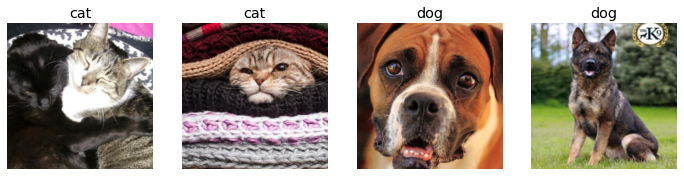

In [12]:
dls.valid.show_batch(max_n=4,nrows=1)

In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)#training our model
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.642852,0.695676,0.282051,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.523944,0.205909,0.076923,00:03
1,0.374369,0.079095,0.051282,00:02
2,0.265118,0.062317,0.025641,00:02
3,0.199810,0.066254,0.025641,00:02


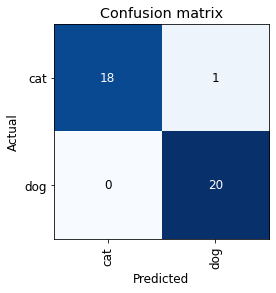

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()#plots a confusion matrix

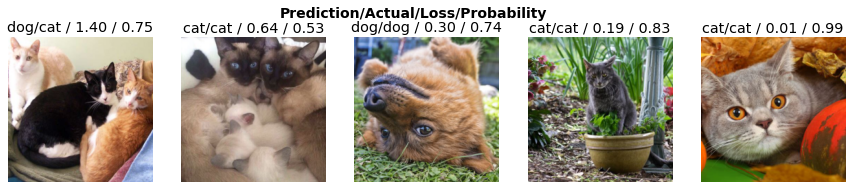

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

learn_inf = load_learner(path/'export.pkl')

btn_upload = widgets.FileUpload()#Displays a widget which can be used to upload images from your system
btn_upload

FileUpload(value={}, description='Upload')

In [17]:
img = PILImage.create(btn_upload.data[-1])

out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))#resizes the uloaded image
out_pl

Output()

In [18]:
pred,pred_idx,probs = learn_inf.predict(img)#asks the model to predict the animal in the image!
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'#displays the output in a readable format
lbl_pred

Label(value='Prediction: cat; Probability: 0.9986')